In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# Obtener una muestra de m elementos
def getSample(m,d,w):
    S = np.random.uniform(-1000,1000,(m,d))
    y = []
    for i in range(len(S)):
        x = np.r_[1,S[i]]
        y.append(np.sign(np.dot(w,x)))
    return np.c_[S,y]

In [91]:
# Algoritmo para encontrar el vector clasificador
def getPerceptron(S,d):
    w = np.zeros(d+1)
    bien_clasificados = 0
    pasos = 0
    registro = [w]
    while bien_clasificados < len(S):
        bien_clasificados = 0
        for i in range(len(S)):
            x = np.r_[1,S[i][:-1]]
            clasificacion = np.sign(np.dot(w,x))
            if clasificacion == S[i][-1]:
                bien_clasificados += 1
            else:
                w = w + S[i][-1]*x
                pasos += 1
                registro.append(w)
    return [w,pasos,registro]

In [92]:
# Dimension del espacio a clasificar
d = 2

In [93]:
# Predictor correcto
w = np.array([-1,1,1])

In [94]:
# Obtener una muestra
m = 1000
S = getSample(m,d,w)

In [96]:
[h,pasos,registro] = getPerceptron(S,d)

320

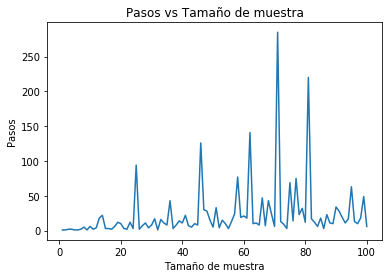

In [97]:
x = []
y = []
for m in range(1,101):
    S = getSample(m,d,w)
    [h,pasos,registro] = getPerceptron(S,d)
    x.append(m)
    y.append(pasos)
plt.plot(x, y)
plt.title('Pasos vs Tamaño de muestra')
plt.xlabel('Tamaño de muestra')
plt.ylabel('Pasos')
plt.show()

In [124]:
S = getSample(100,d,w)
[h,pasos,registro] = getPerceptron(S,d)

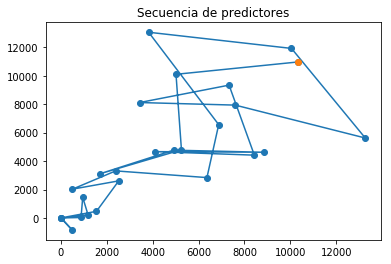

In [125]:
x = []
y = []
for w in registro:
    x.append(w[0]*w[1])
    y.append(w[0]*w[2])
plt.plot(x, y,'-o')
plt.plot(x[-1], y[-1],'o')
plt.title('Secuencia de predictores')
plt.show()